In [2]:
import matplotlib.pyplot as plt
import numpy as np

Range of IMG_GRAY: 0-1.0


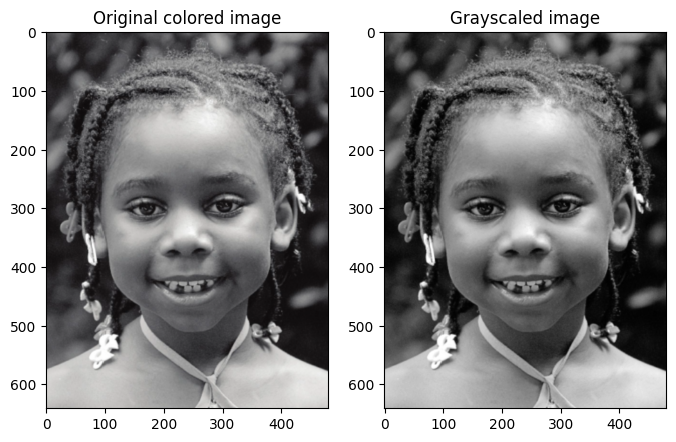

In [6]:
IMG_FILENAME = 'blackkid.png'

# Grayscale the image
IMG = plt.imread(IMG_FILENAME)
IMG_GRAY = np.mean(IMG, axis=2)
print(f'Range of IMG_GRAY: 0-{IMG_GRAY.max()}')

# Plot
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
ax[0].imshow(IMG)
ax[0].set_title('Original colored image')
ax[1].imshow(IMG_GRAY, cmap='gray')
ax[1].set_title('Grayscaled image')
plt.show()

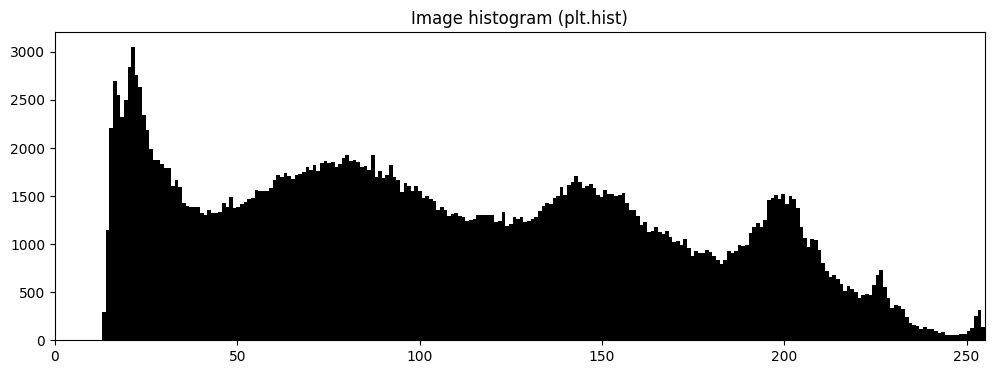

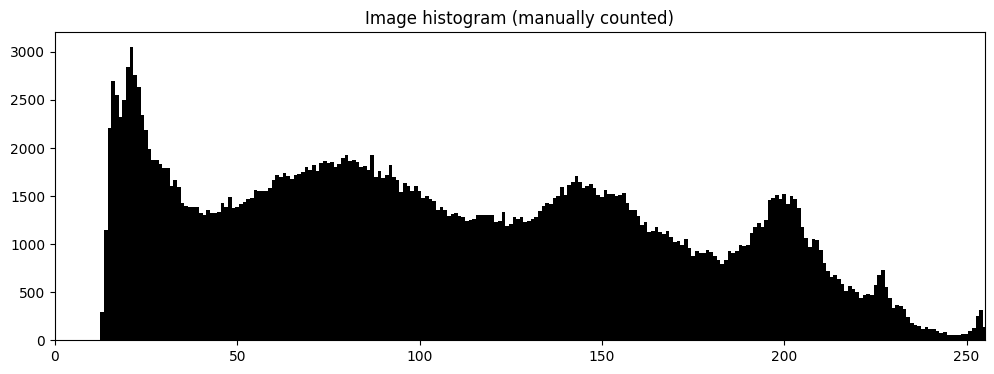

In [7]:
# Flatten image
flatimg = IMG_GRAY.flatten()
flatimg = np.round(flatimg * 255)  # Rescale to 0-255

# Image histogram (matplotlib)
plt.figure(figsize=(12,4))
plt.hist(flatimg, bins=256, range=(0,255), color='black')
plt.xlim(0,255)
plt.title('Image histogram (plt.hist)')
plt.show()

# Image histogram (manual algorithm)
value = range(256)
hist = np.zeros(256)
for px in flatimg:
    i = round(px)
    hist[i] += 1

plt.figure(figsize=(12,4))
plt.bar(value, hist, width=1, color='black')
plt.xlim(0,255)
plt.title('Image histogram (manually counted)')
plt.show()

In [8]:
# Convert flatten img to CDF
def CDF(arr, normalize=True):
    # Histogram
    hist = np.zeros(256)
    for px in arr:
        i = round(px)
        hist[i] += 1
    
    # CDF
    CDF = np.zeros(256)
    for i, value in enumerate(CDF):
        if i == 0:
            CDF[i] = hist[i]
        else:
            CDF[i] = np.sum(hist[:i+1])

    # Normalize to 1
    if normalize == True:
        CDF /= CDF.max()

    return CDF

Range of IMG_GRAY: 0-1.0


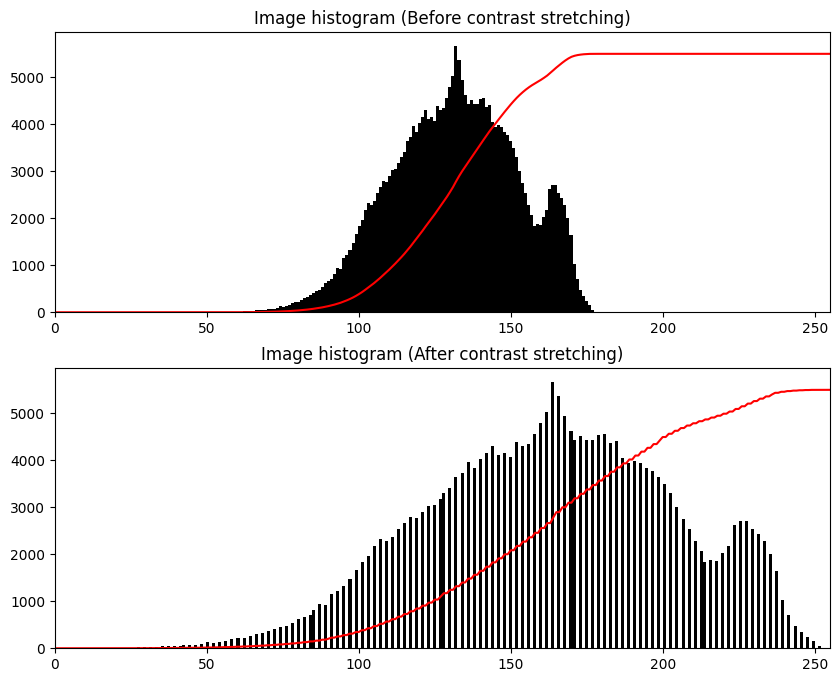

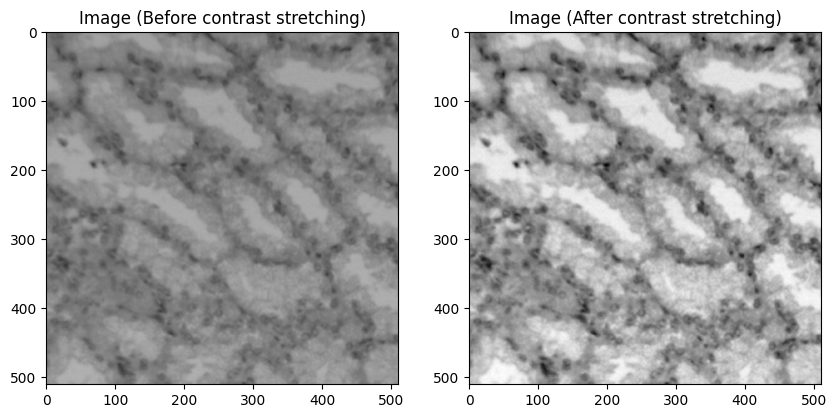

In [69]:
IMG_FILENAME = 'texture.png'

# Grayscale and flatten the image
IMG = plt.imread(IMG_FILENAME)
print(f'Range of IMG_GRAY: 0-{IMG_GRAY.max()}')

flatimg = IMG.flatten()
flatimg = np.round(flatimg * 255)  # Rescale to 0-255

# Strech image
stretch = 255 * (flatimg - flatimg.min()) / (flatimg.max() - flatimg.min())

# Get CDFs
CDF_0 = CDF(flatimg)
CDF_S = CDF(stretch)

# Plot image histogram
value = range(256)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].hist(flatimg, bins=256, range=(0,255), color='black')
ax[0].plot(value, CDF_0*5500, color='red')
ax[0].set_xlim(0,255)
ax[0].set_title('Image histogram (Before contrast stretching)')

ax[1].hist(stretch, bins=256, range=(0,255), color='black')
ax[1].plot(value, CDF_S*5500, color='red')
ax[1].set_xlim(0,255)
ax[1].set_title('Image histogram (After contrast stretching)')

plt.show()

# Plot images
IMG_S = stretch.reshape(IMG.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].imshow(IMG, cmap='gray', vmin=0, vmax=1)
ax[0].set_title('Image (Before contrast stretching)')
ax[1].imshow(IMG_S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Image (After contrast stretching)')
plt.show()